# Exploratory data analysis

vending machine 1 month transactions from 3 position
- airport
- crowd hospital
- newly hospital

with all related sale's information including products, campaigns, promotions, payment, and machine information

but didn't have recipes for each drink to calculate ingredient used for each menu

In [635]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

df = pd.read_excel('datasets/sources/Transactions-REPORT1-31-10-2023.xlsx')

In [636]:
print(df.shape)
df.info()

(15634, 33)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15634 entries, 0 to 15633
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   time                15634 non-null  object        
 1   transId             15634 non-null  int64         
 2   maId                15634 non-null  object        
 3   maName              15634 non-null  object        
 4   machineId           15634 non-null  int64         
 5   machineName         15634 non-null  object        
 6   productCode         15634 non-null  object        
 7   productName         15634 non-null  object        
 8   payName             15541 non-null  object        
 9   cashAmount          15634 non-null  int64         
 10  walletAmount        15634 non-null  int64         
 11  creditAmount        15634 non-null  int64         
 12  mCreditAmount       15634 non-null  int64         
 13  campaignAmount      15634 non-null

In [637]:
df.head()

,time,transId,maId,maName,machineId,machineName,productCode,productName,payName,cashAmount,...,campaignCodeType,telephoneNumber,locationType,price,amount,promotionDiscount,paymentType,paymentTypeChannel,terminalId,terminalTransId
0,2023-10-01 00:00:00,6765551842,ca656402-5cba-458d-a94b-b49e92966da7,Forth CK,200007,AOTสนามบินสุวรรณภูมิ (อาคารลานจอดรถ 3 ชั้น 5),12-21-01-0004,Hot Latte (s),linepay,0,...,NaN,816466651,Airport,35,35,0,qrcode,linepay,NaN,NaN
1,2023-10-01 00:00:00,6765554249,ca656402-5cba-458d-a94b-b49e92966da7,Forth CK,200007,AOTสนามบินสุวรรณภูมิ (อาคารลานจอดรถ 3 ชั้น 5),12-02-02-0046,Unknown Product,cash,30,...,NaN,817266264,Airport,30,30,0,cash,cash,NaN,NaN
2,2023-10-01 00:00:00,6765555693,ca656402-5cba-458d-a94b-b49e92966da7,Forth CK,200007,AOTสนามบินสุวรรณภูมิ (อาคารลานจอดรถ 3 ชั้น 5),12-05-02-0046,Pepsi Plum,cash,20,...,NaN,922647207,Airport,20,20,0,cash,cash,NaN,NaN
3,2023-10-01 00:00:00,6765558174,ca656402-5cba-458d-a94b-b49e92966da7,Forth CK,200007,AOTสนามบินสุวรรณภูมิ (อาคารลานจอดรถ 3 ชั้น 5),12-05-02-0046,Pepsi Plum,cash,20,...,NaN,899999999,Airport,20,20,0,cash,cash,NaN,NaN
4,2023-10-01 00:00:00,6765559297,ca656402-5cba-458d-a94b-b49e92966da7,Forth CK,200007,AOTสนามบินสุวรรณภูมิ (อาคารลานจอดรถ 3 ชั้น 5),12-03-02-0005,Milk With Iced,cash,30,...,NaN,899999999,Airport,30,30,0,cash,cash,NaN,NaN


<Axes: >

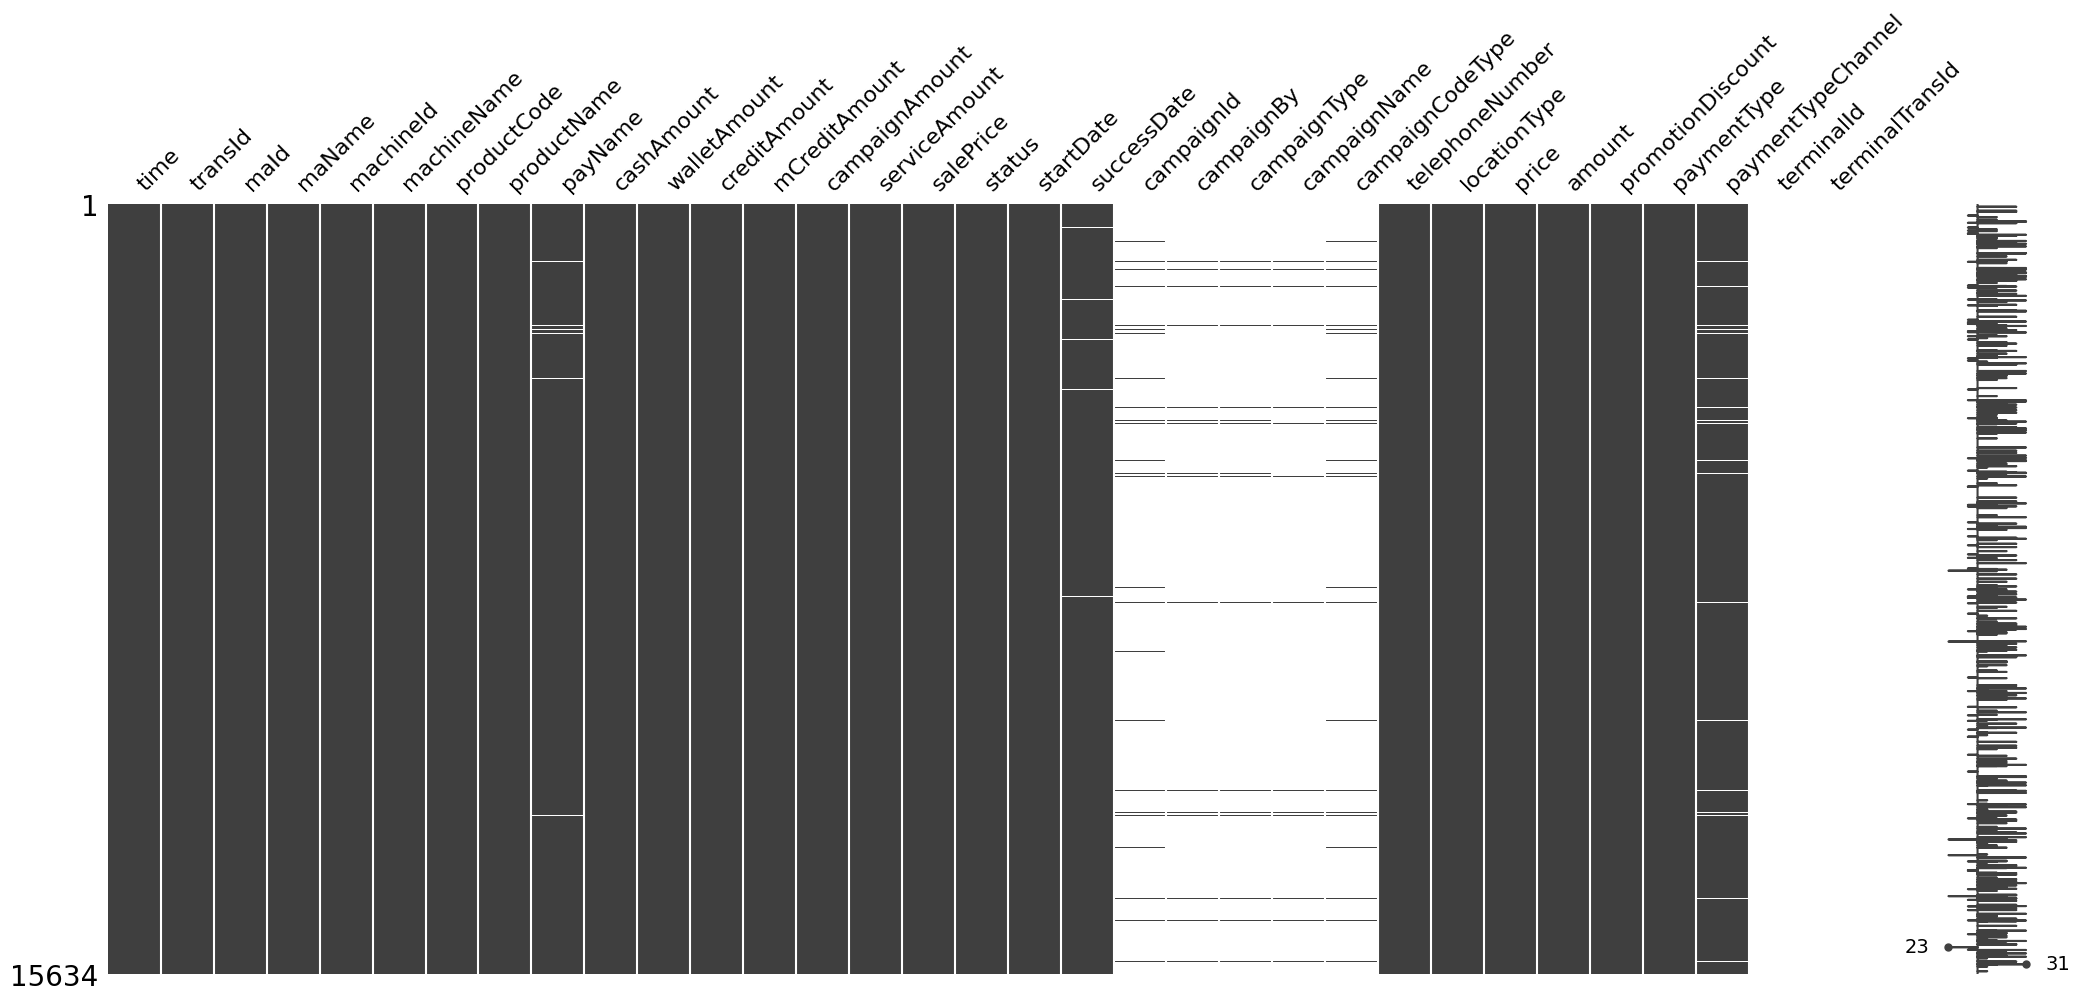

In [638]:
msno.matrix(df)

### Time, startDate and successDate Column

In [639]:
print(df.time.unique()[11:14])
print(df.startDate.unique()[11:14])
print(df.successDate.unique()[11:14])

[datetime.datetime(2023, 10, 13, 0, 0) '14/10/2023' '15/10/2023']
<DatetimeArray>
['2023-10-01 01:14:26', '2023-10-01 01:15:02', '2023-10-01 01:20:36']
Length: 3, dtype: datetime64[ns]
<DatetimeArray>
['2023-10-01 01:14:26', '2023-10-01 01:15:02', '2023-10-01 01:20:36']
Length: 3, dtype: datetime64[ns]


In [640]:
df.time.isna().sum(), df.startDate.isna().sum(), df.successDate.isna().sum()

(0, 0, 88)

As we get DateTime information that need to use for `DateTimeIndex` 
after check null, explore, and compare 

Decision: better use `startDate` as `DateTimeIndex`

In [641]:
df.set_index('startDate', inplace=True)

### Campaign columns 

all `campaign` related almost Null value since promotions and campaigns shouldn't cover all transaction by most 

that may be lead to more transactions in campaign/promotion periods but we didn't have this marketing information yet

so we decide to ignore this information at this step


In [642]:
# all campaigns
df['campaignName'].value_counts()

campaignName
เต่าบินซื้อ 30 รับฟรี 1 (AUTO)                          90
ชดเชยตัวแทน                                             73
คูปองวันเกิดสมาชิก "เต่าเตาะแตะ" (AUTO)                 54
ส่วนลดเมื่อสมัครสมาชิก (AUTO)                           11
แจกคูปองเมื่อสมาชิกเลื่อนเป็น "เต่าติดปีก" (AUTO)        3
คูปองวันเกิดสมาชิก "เต่าติดปีก - ผู้เฒ่าเต่า" (AUTO)     3
ชดเชยลูกค้าอัตโนมัติที่หน้าตู้                           1
Name: count, dtype: int64

### Payment Column

describe payment methods.
some cannot processing payment so null

In [643]:
# check payName null value
df[df['payName'].isnull()].head(3)

,time,transId,maId,maName,machineId,machineName,productCode,productName,payName,cashAmount,...,campaignCodeType,telephoneNumber,locationType,price,amount,promotionDiscount,paymentType,paymentTypeChannel,terminalId,terminalTransId
startDate,,,,,,,,,,,,,,,,,,,,,
2023-10-02 20:58:54,2023-10-02 00:00:00,6767819529,ca656402-5cba-458d-a94b-b49e92966da7,Forth CK,200007,AOTสนามบินสุวรรณภูมิ (อาคารลานจอดรถ 3 ชั้น 5),12-05-02-0046,Pepsi Plum,NaN,10,...,Purchase,982160168,Airport,20,10,10,cash,NaN,NaN,NaN
2023-10-02 00:03:00,2023-10-02 00:00:00,6766723038,ca656402-5cba-458d-a94b-b49e92966da7,Forth CK,200005,โรงพยาบาลรามาธิบดี (อาคารสมเด็จพระเทพรัตน์ หัว...,12-03-02-0002,Iced Cocoa,NaN,30,...,Purchase,942622158,Hospital,35,30,5,cash,NaN,NaN,NaN
2023-10-02 07:48:04,2023-10-02 00:00:00,6766918198,ca656402-5cba-458d-a94b-b49e92966da7,Forth CK,200005,โรงพยาบาลรามาธิบดี (อาคารสมเด็จพระเทพรัตน์ หัว...,12-21-01-0004,Hot Latte (s),NaN,25,...,Purchase,986499918,Hospital,35,25,10,cash,NaN,NaN,NaN


In [644]:
print(df['payName'].unique())

['linepay' 'cash' 'kbank' 'truewallet' '-' 'shopeepay' nan 'lazadapay'
 'wechat']


### Machine place

In [645]:
# unique value of machineId
print(df['machineId'].unique())
print(df['machineName'].unique())

[200007 200005 177707]
['AOTสนามบินสุวรรณภูมิ (อาคารลานจอดรถ 3 ชั้น 5)'
 'โรงพยาบาลรามาธิบดี (อาคารสมเด็จพระเทพรัตน์ หัวมุมถนน)'
 'โรงพยาบาลวิมุต (ชั้น1)']


In [646]:
# split data into each machineId
df_m1 = df[df['machineId'] == 200007]
df_m2 = df[df['machineId'] == 200005]
df_m3 = df[df['machineId'] == 177707]

### Daily transactions

In [647]:
m1_daily_sales = df_m1.groupby(df_m1.index.date)['amount'].count()
m2_daily_sales = df_m2.groupby(df_m2.index.date)['amount'].count()
m3_daily_sales = df_m3.groupby(df_m3.index.date)['amount'].count()

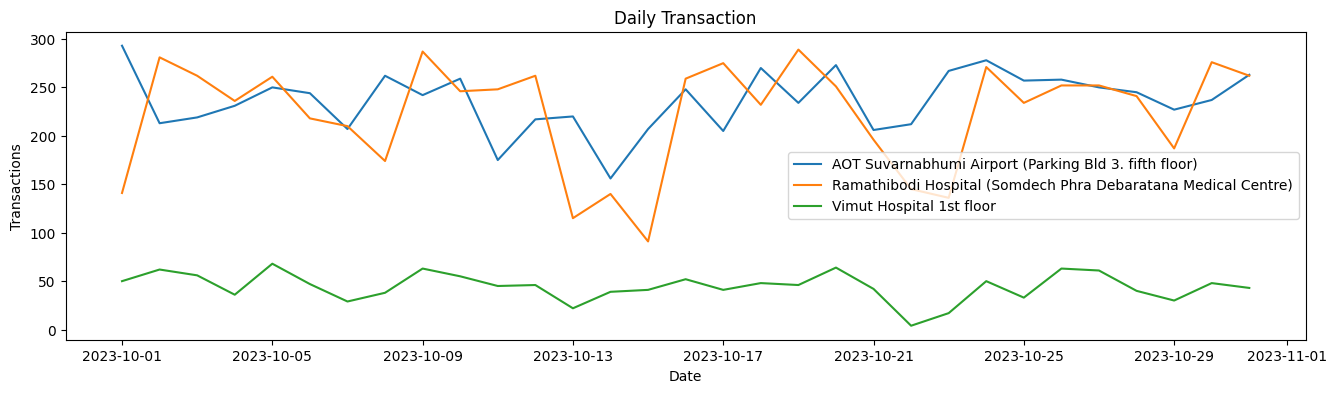

In [648]:
plt.figure(figsize=(16, 4))
m1_daily_sales.plot(label='AOT Suvarnabhumi Airport (Parking Bld 3. fifth floor)')
m2_daily_sales.plot(label='Ramathibodi Hospital (Somdech Phra Debaratana Medical Centre)')
m3_daily_sales.plot(label='Vimut Hospital 1st floor')
plt.xlabel('Date')
plt.ylabel('Transactions')
plt.legend()
plt.title('Daily Transaction');

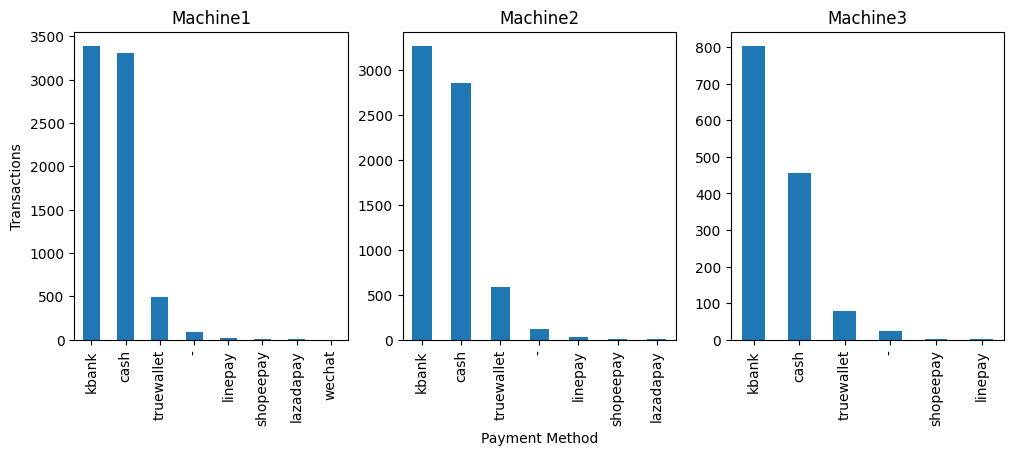

In [649]:
# plot most popular payment method group by machineId
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
df_m1['payName'].value_counts().plot(kind='bar')
plt.xlabel('')
plt.ylabel('Transactions')
plt.title('Machine1');

plt.subplot(1, 3, 2)
df_m2['payName'].value_counts().plot(kind='bar')
plt.xlabel('Payment Method')
plt.title('Machine2');

plt.subplot(1, 3, 3)
df_m3['payName'].value_counts().plot(kind='bar')
plt.xlabel('')
plt.title('Machine3');


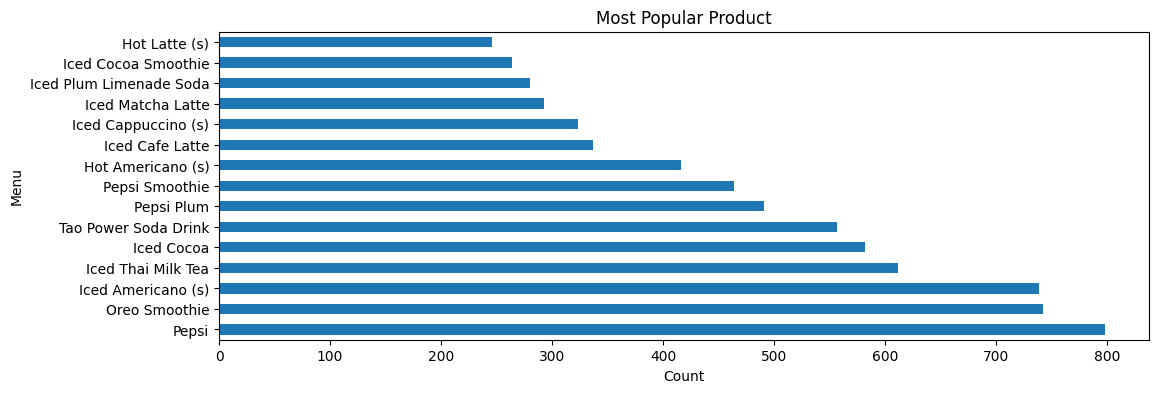

In [650]:
# plot top 20 popular product name (ignore UnKnown product)
plt.figure(figsize=(12, 4))
df['productName'].value_counts()[1:16].plot(kind='barh')
plt.ylabel('Menu')
plt.xlabel('Count')
plt.title('Most Popular Product');


### Daily datasets

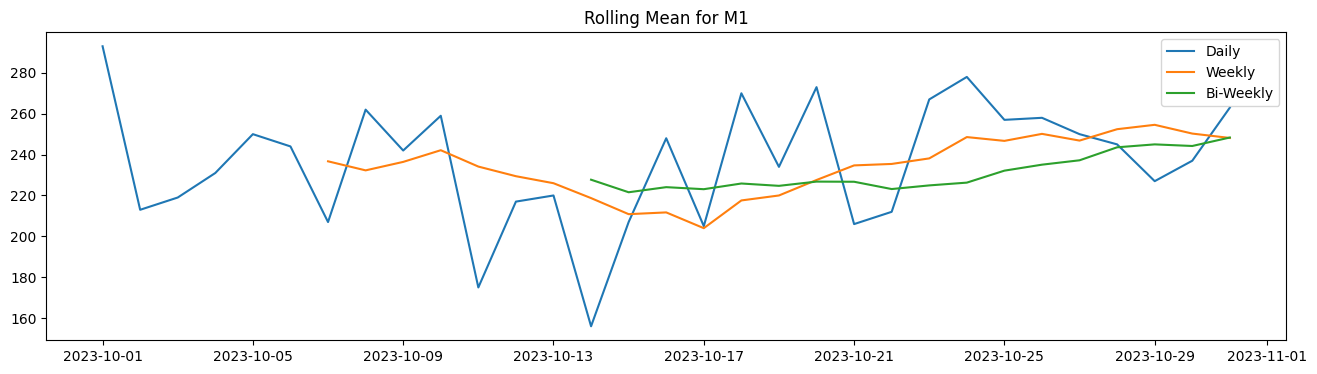

In [651]:
# rolling mean and std
plt.figure(figsize=(16, 4))
m1_daily_sales.rolling(1).mean().plot(label='Daily')
m1_daily_sales.rolling(7).mean().plot(label='Weekly')
m1_daily_sales.rolling(14).mean().plot(label='Bi-Weekly')
plt.legend()
plt.title('Rolling Mean for M1');



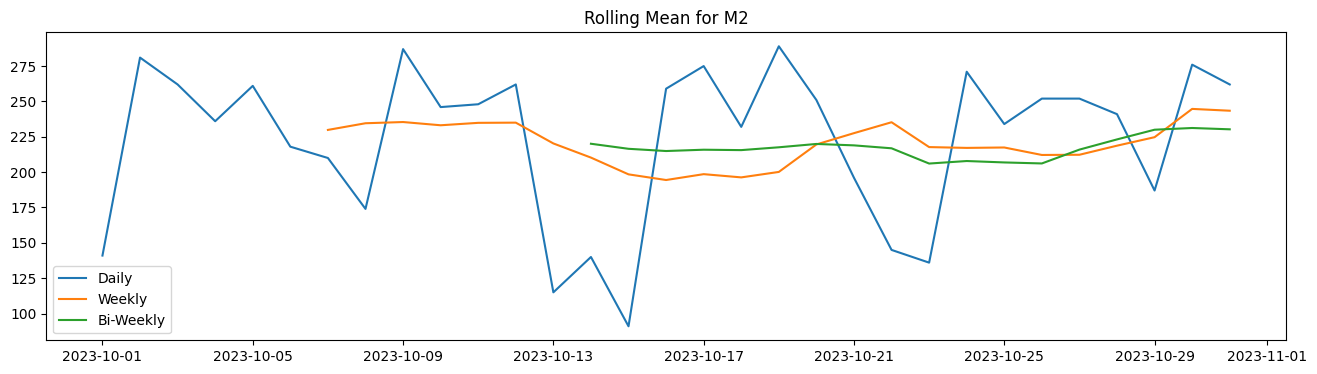

In [652]:
# rolling mean and std
plt.figure(figsize=(16, 4))
m2_daily_sales.rolling(1).mean().plot(label='Daily')
m2_daily_sales.rolling(7).mean().plot(label='Weekly')
m2_daily_sales.rolling(14).mean().plot(label='Bi-Weekly')
plt.legend()
plt.title('Rolling Mean for M2');

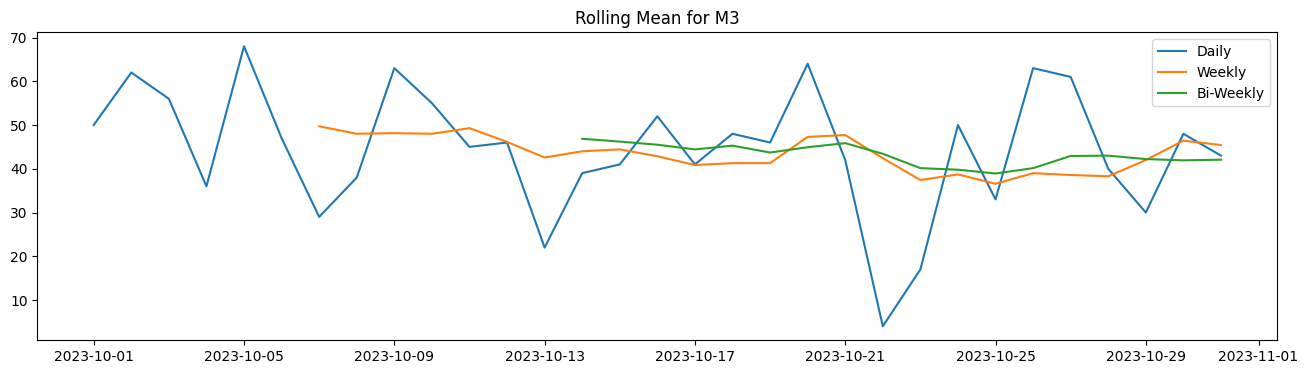

In [653]:
# rolling mean and std
plt.figure(figsize=(16, 4))
m3_daily_sales.rolling(1).mean().plot(label='Daily')
m3_daily_sales.rolling(7).mean().plot(label='Weekly')
m3_daily_sales.rolling(14).mean().plot(label='Bi-Weekly')
plt.legend()
plt.title('Rolling Mean for M3');

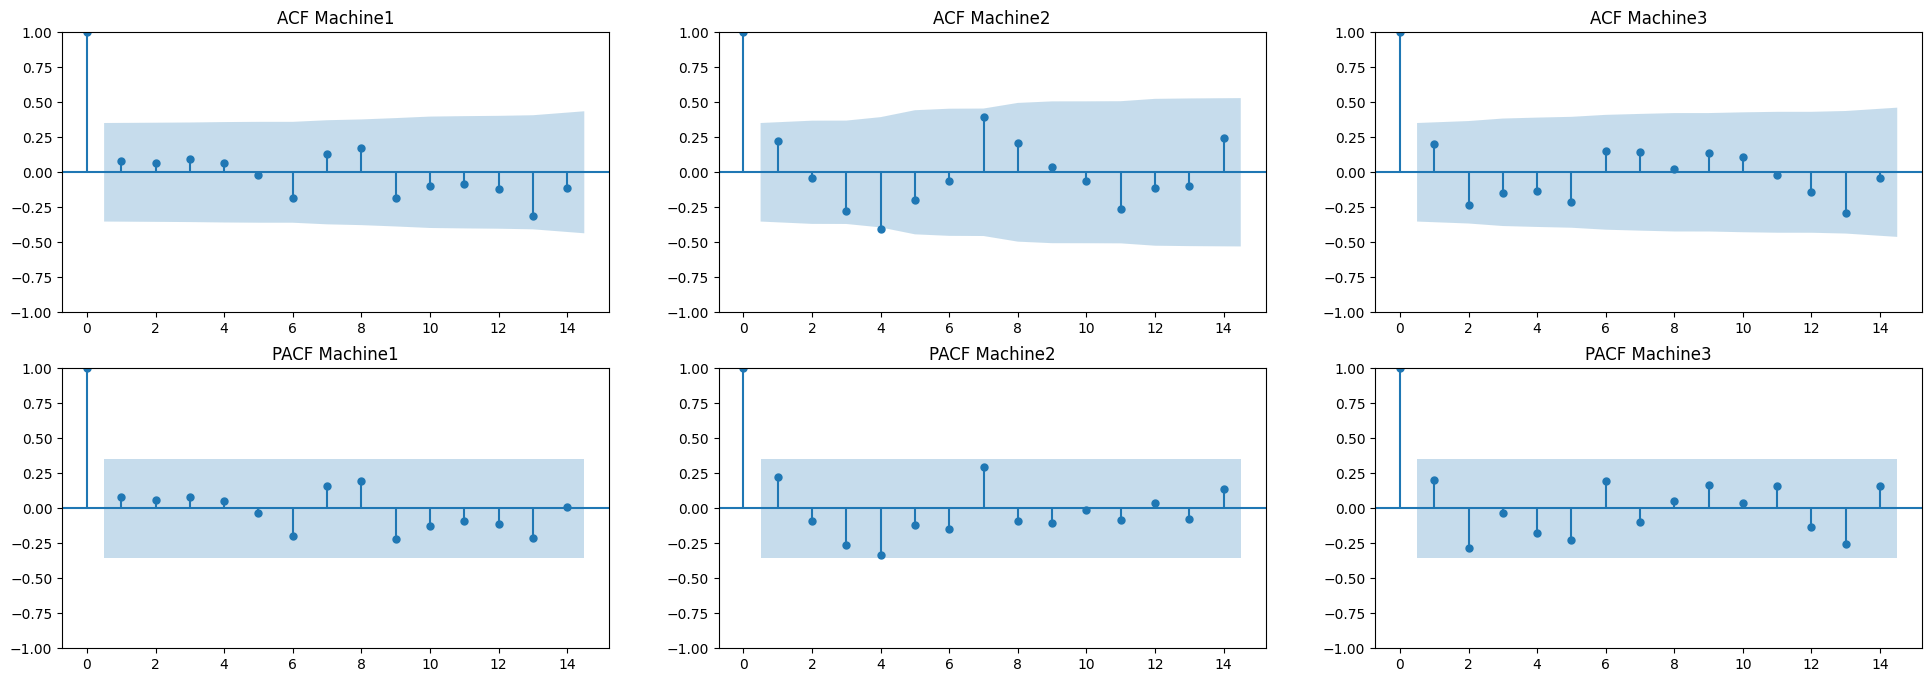

In [654]:
# Auto correlation and partial auto correlation
fig, ax = plt.subplots(2, 3, figsize=(24, 8))
plot_acf(m1_daily_sales, lags=14, ax=ax[0][0], title='ACF Machine1')
plot_acf(m2_daily_sales, lags=14, ax=ax[0][1], title='ACF Machine2')
plot_acf(m3_daily_sales, lags=14, ax=ax[0][2], title='ACF Machine3')

plot_pacf(m1_daily_sales, lags=14, ax=ax[1][0], title='PACF Machine1')
plot_pacf(m2_daily_sales, lags=14, ax=ax[1][1], title='PACF Machine2')
plot_pacf(m3_daily_sales, lags=14, ax=ax[1][2], title='PACF Machine3')
plt.show()

Seemlike Daily information didin't make significant in periods pattern
and can't help to predict day to day plan that much so we will dig deep down into hourly

### Hourly datasets

In [655]:
# group by hour
m1_hourly_sales = pd.DataFrame(df_m1.groupby([df_m1.index.date, df_m1.index.hour])['amount'].count())
m2_hourly_sales = pd.DataFrame(df_m2.groupby([df_m2.index.date, df_m2.index.hour])['amount'].count())
m3_hourly_sales = pd.DataFrame(df_m3.groupby([df_m3.index.date, df_m3.index.hour])['amount'].count())


In [656]:
# setup datetime index with date and hour
m1_hourly_sales.index = pd.DatetimeIndex([str(x[0]) + ' ' + str(x[1]) + ':00:00' for x in m1_hourly_sales.index])
m2_hourly_sales.index = pd.DatetimeIndex([str(x[0]) + ' ' + str(x[1]) + ':00:00' for x in m2_hourly_sales.index])
m3_hourly_sales.index = pd.DatetimeIndex([str(x[0]) + ' ' + str(x[1]) + ':00:00' for x in m3_hourly_sales.index])


In [657]:
m1_hourly_sales.index

DatetimeIndex(['2023-10-01 00:00:00', '2023-10-01 01:00:00',
               '2023-10-01 02:00:00', '2023-10-01 03:00:00',
               '2023-10-01 04:00:00', '2023-10-01 05:00:00',
               '2023-10-01 06:00:00', '2023-10-01 07:00:00',
               '2023-10-01 08:00:00', '2023-10-01 09:00:00',
               ...
               '2023-10-31 14:00:00', '2023-10-31 15:00:00',
               '2023-10-31 16:00:00', '2023-10-31 17:00:00',
               '2023-10-31 18:00:00', '2023-10-31 19:00:00',
               '2023-10-31 20:00:00', '2023-10-31 21:00:00',
               '2023-10-31 22:00:00', '2023-10-31 23:00:00'],
              dtype='datetime64[ns]', length=706, freq=None)

In [658]:
m1_hourly_sales = m1_hourly_sales.resample('H').sum()
m2_hourly_sales = m2_hourly_sales.resample('H').sum()
m3_hourly_sales = m3_hourly_sales.resample('H').sum()


In [659]:
# convert index into datetime
m1_hourly_sales.index = pd.DatetimeIndex(m1_hourly_sales.index, freq='H')
m2_hourly_sales.index = pd.DatetimeIndex(m2_hourly_sales.index, freq='H')
m3_hourly_sales.index = pd.DatetimeIndex(m3_hourly_sales.index, freq='H')

In [660]:
m1_hourly_sales.index

DatetimeIndex(['2023-10-01 00:00:00', '2023-10-01 01:00:00',
               '2023-10-01 02:00:00', '2023-10-01 03:00:00',
               '2023-10-01 04:00:00', '2023-10-01 05:00:00',
               '2023-10-01 06:00:00', '2023-10-01 07:00:00',
               '2023-10-01 08:00:00', '2023-10-01 09:00:00',
               ...
               '2023-10-31 14:00:00', '2023-10-31 15:00:00',
               '2023-10-31 16:00:00', '2023-10-31 17:00:00',
               '2023-10-31 18:00:00', '2023-10-31 19:00:00',
               '2023-10-31 20:00:00', '2023-10-31 21:00:00',
               '2023-10-31 22:00:00', '2023-10-31 23:00:00'],
              dtype='datetime64[ns]', length=744, freq='H')

In [661]:
m1_hourly_sales.head()

,amount
2023-10-01 00:00:00,11
2023-10-01 01:00:00,10
2023-10-01 02:00:00,4
2023-10-01 03:00:00,5
2023-10-01 04:00:00,4


In [662]:
m1_hourly_sales.sort_index(inplace=True)
m2_hourly_sales.sort_index(inplace=True)
m3_hourly_sales.sort_index(inplace=True)

In [663]:
m3_hourly_sales.head(5)

,amount
2023-10-01 00:00:00,1
2023-10-01 01:00:00,2
2023-10-01 02:00:00,0
2023-10-01 03:00:00,2
2023-10-01 04:00:00,0


In [664]:
m3_hourly_sales.tail(5)

,amount
2023-10-31 19:00:00,1
2023-10-31 20:00:00,0
2023-10-31 21:00:00,0
2023-10-31 22:00:00,2
2023-10-31 23:00:00,1


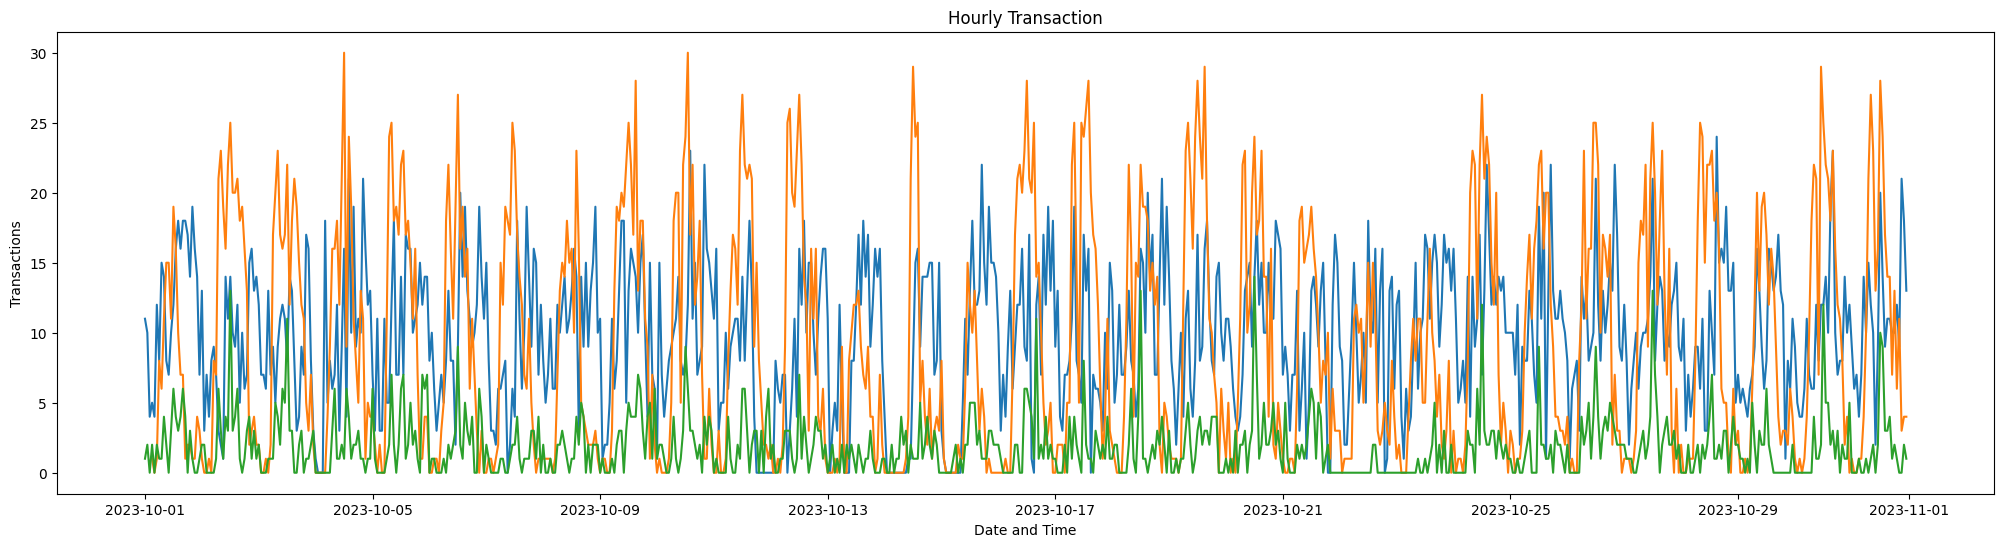

In [665]:
# plot by hour for first 7 day
plt.figure(figsize=(25, 6))
plt.plot(m1_hourly_sales, label='AOT Suvarnabhumi Airport (Parking Bld 3. fifth floor)')
plt.plot(m2_hourly_sales, label='Ramathibodi Hospital (Somdech Phra Debaratana Medical Centre)')
plt.plot(m3_hourly_sales, label='Vimut Hospital 1st floor')
plt.xlabel('Date and Time')
plt.ylabel('Transactions')
# plt.legend()
plt.title('Hourly Transaction');


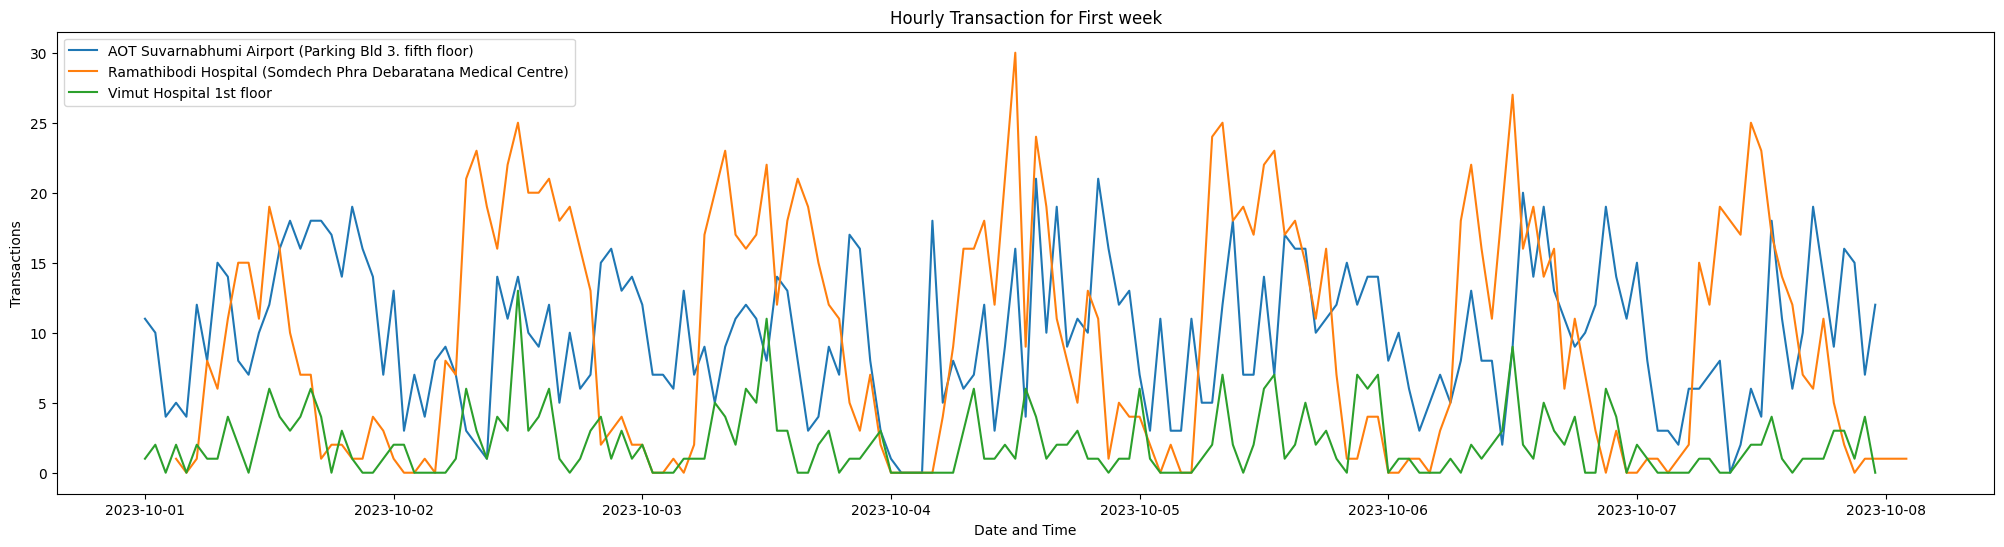

In [666]:
# plot by hour for first 7 day
plt.figure(figsize=(25, 6))
plt.plot(m1_hourly_sales[:(24*7)], label='AOT Suvarnabhumi Airport (Parking Bld 3. fifth floor)')
plt.plot(m2_hourly_sales[:(24*7)], label='Ramathibodi Hospital (Somdech Phra Debaratana Medical Centre)')
plt.plot(m3_hourly_sales[:(24*7)], label='Vimut Hospital 1st floor')
plt.xlabel('Date and Time')
plt.ylabel('Transactions')
plt.legend()
plt.title('Hourly Transaction for First week');


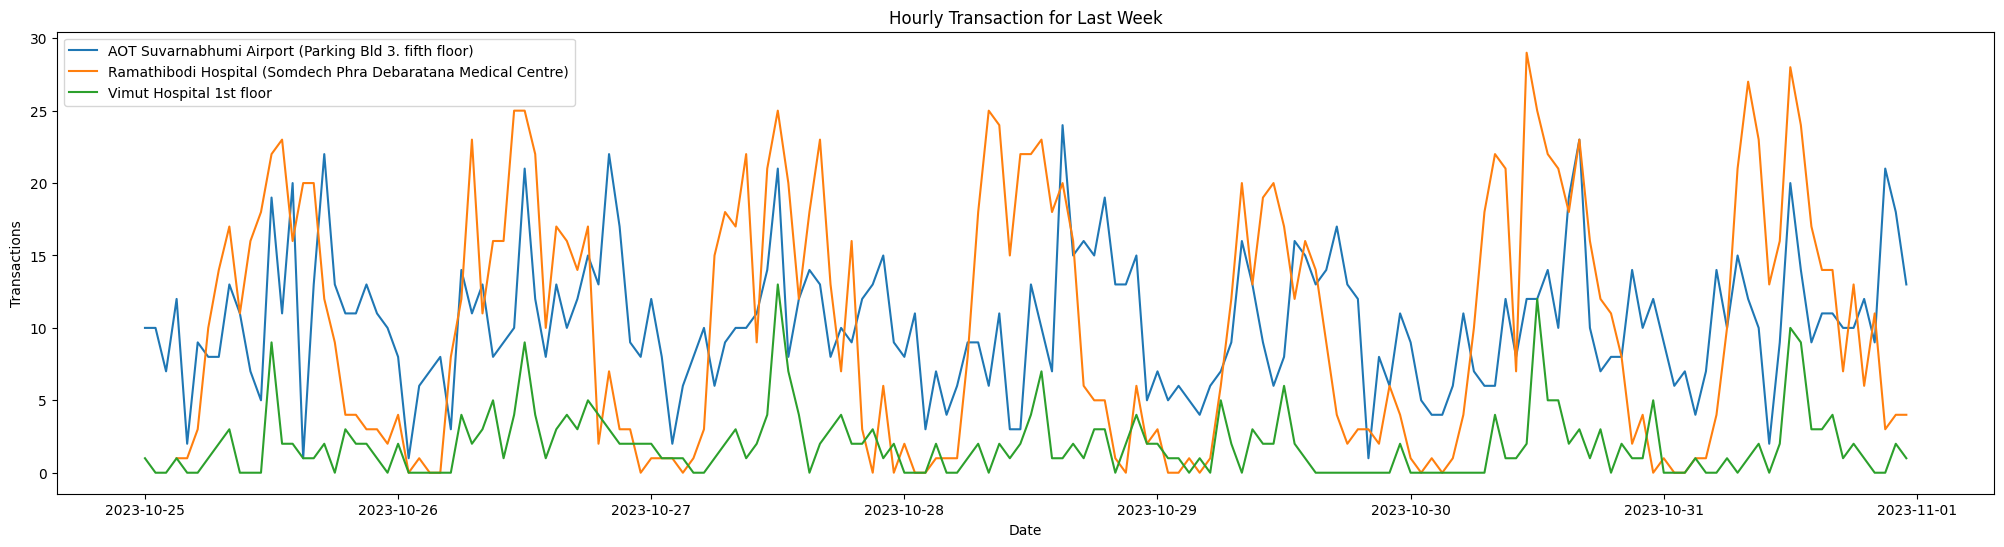

In [667]:
# plot by hour for last 7 days
plt.figure(figsize=(25, 6))
plt.plot(m1_hourly_sales[(24*24):(24*31)], label='AOT Suvarnabhumi Airport (Parking Bld 3. fifth floor)')
plt.plot(m2_hourly_sales[(24*24):(24*31)], label='Ramathibodi Hospital (Somdech Phra Debaratana Medical Centre)')
plt.plot(m3_hourly_sales[(24*24):(24*31)], label='Vimut Hospital 1st floor')
plt.xlabel('Date')
plt.ylabel('Transactions')
plt.legend()
plt.title('Hourly Transaction for Last Week');

##### Machine Explore Data Analysis

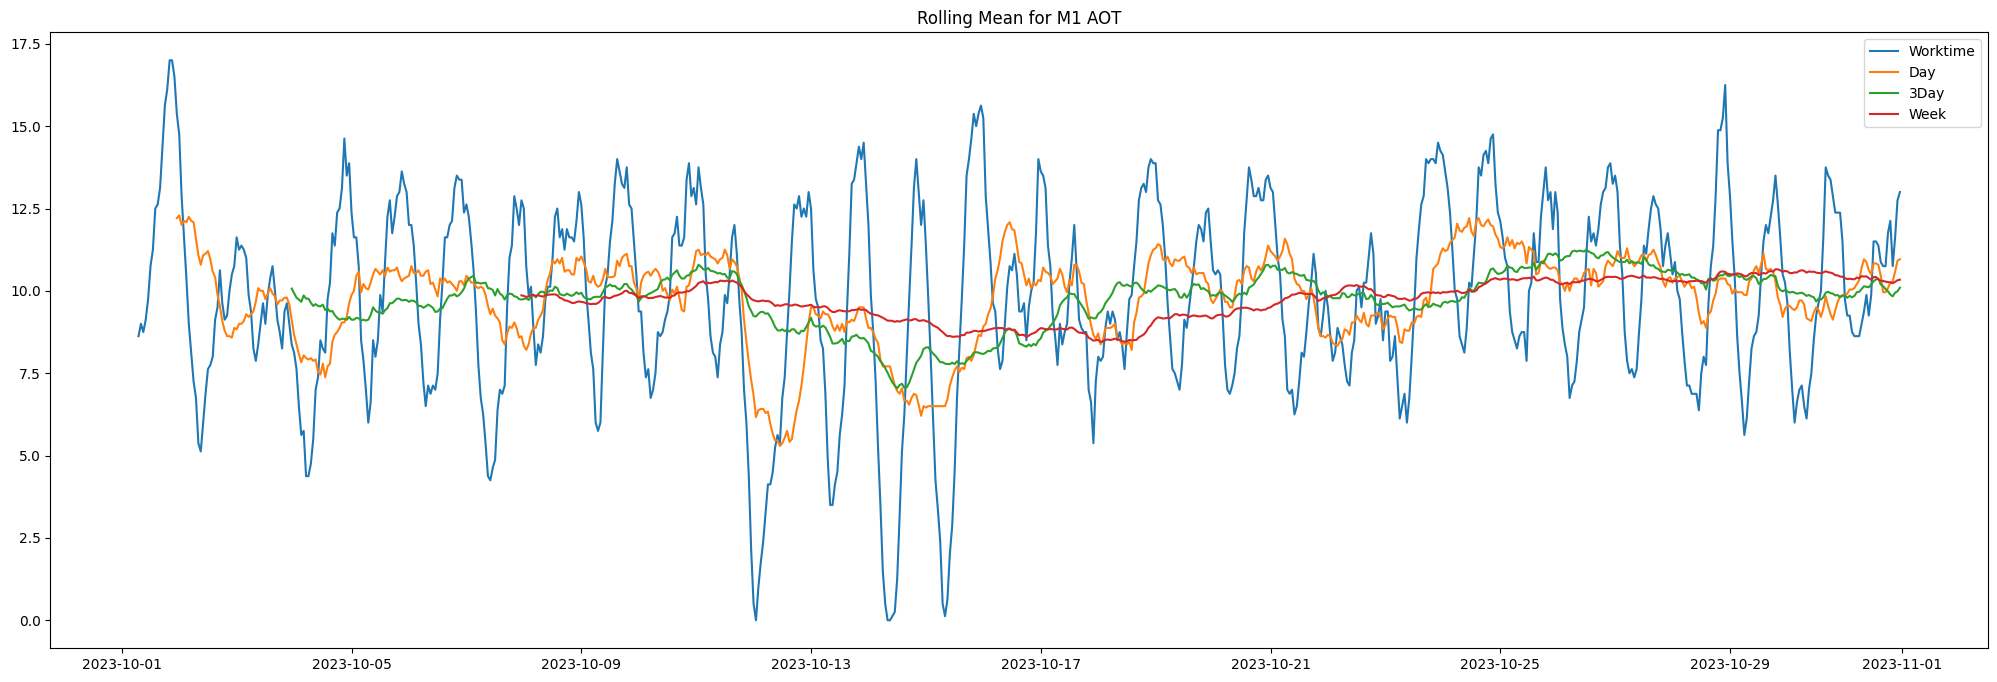

In [668]:
# Rolling mean for hourly sales M1
plt.figure(figsize=(25, 8))
# plt.plot(m1_hourly_sales.rolling(1).mean(), label='Hourly') # too noisy
plt.plot(m1_hourly_sales.rolling(8).mean(), label='Worktime')
plt.plot(m1_hourly_sales.rolling(24).mean(), label='Day')
plt.plot(m1_hourly_sales.rolling(72).mean(), label='3Day')
plt.plot(m1_hourly_sales.rolling(168).mean(), label='Week')
plt.legend()
plt.title('Rolling Mean for M1 AOT');


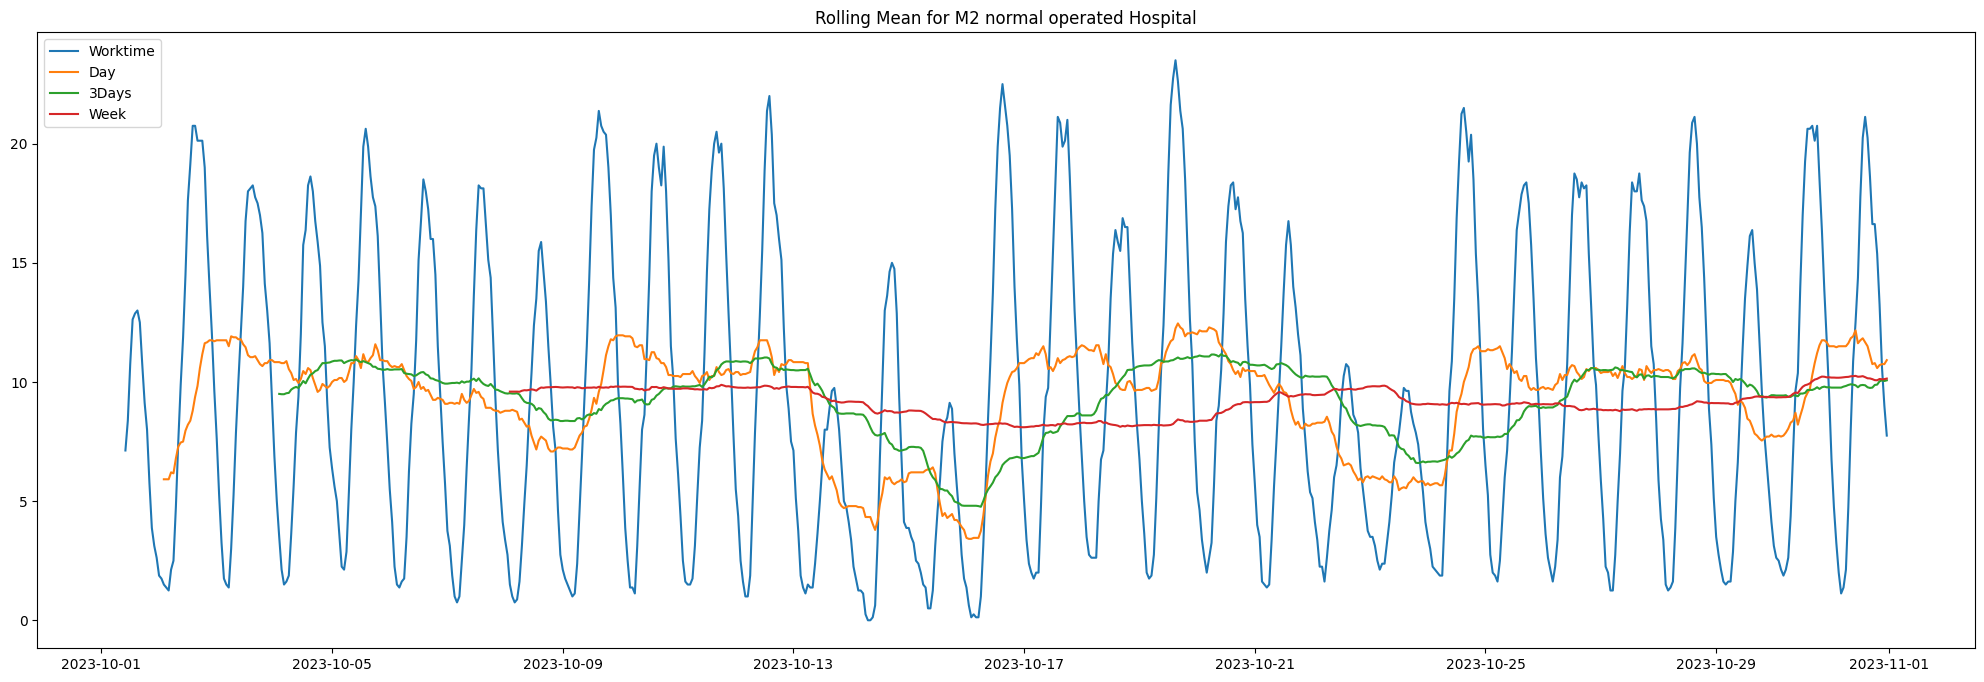

In [669]:
# Rolling mean for hourly sales M2
plt.figure(figsize=(25, 8))
# plt.plot(m2_hourly_sales.rolling(1).mean(), label='Hourly') # too noisy
plt.plot(m2_hourly_sales.rolling(8).mean(), label='Worktime')
plt.plot(m2_hourly_sales.rolling(24).mean(), label='Day')
plt.plot(m2_hourly_sales.rolling(72).mean(), label='3Days')
plt.plot(m2_hourly_sales.rolling(168).mean(), label='Week')
plt.legend()
plt.title('Rolling Mean for M2 normal operated Hospital');


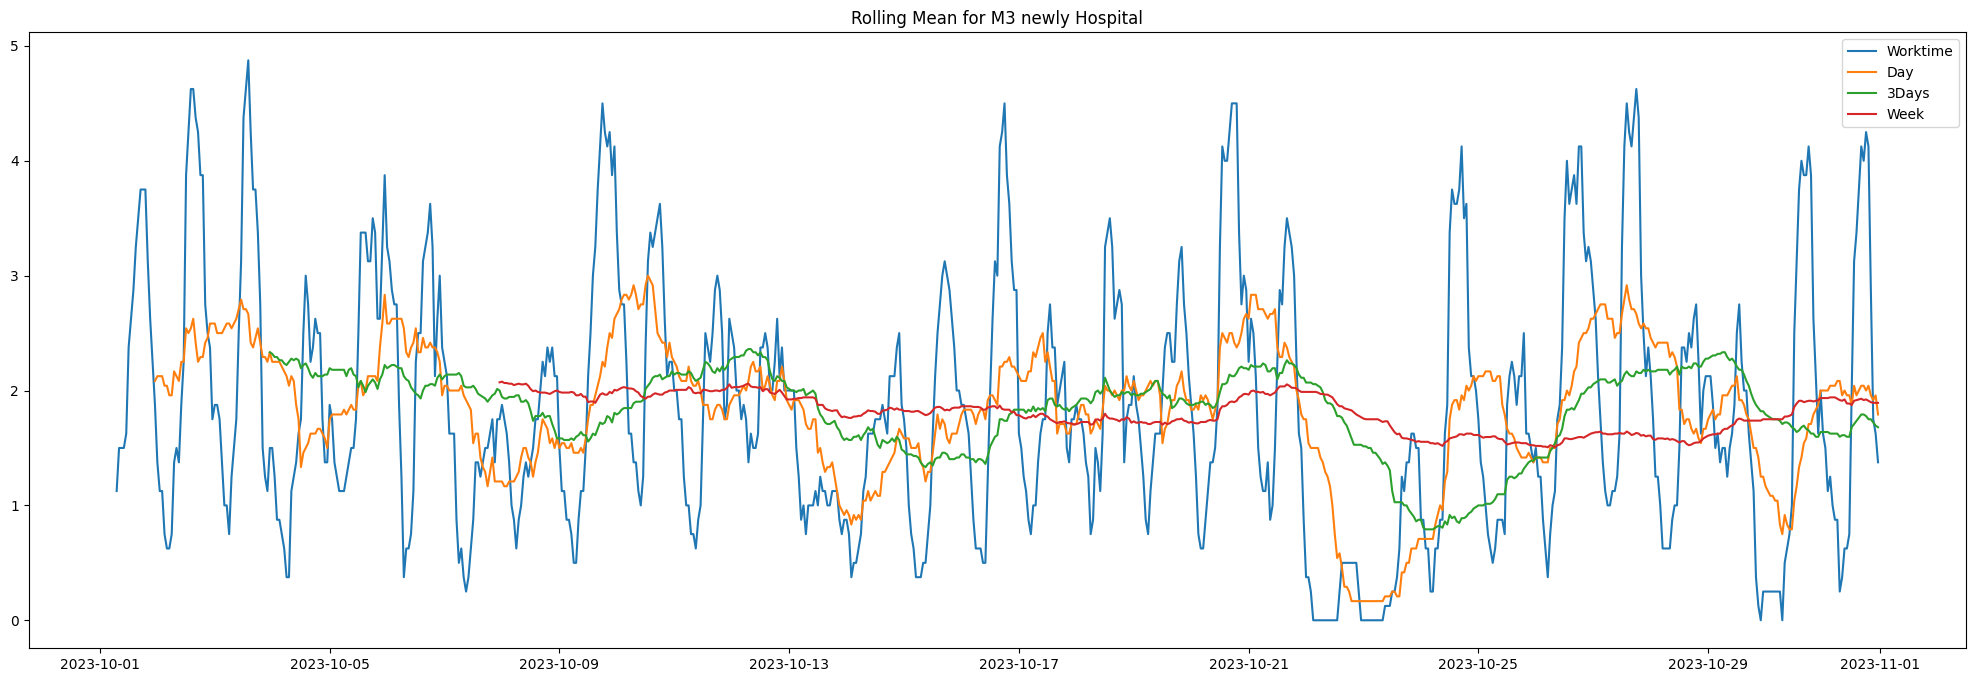

In [670]:
# Rolling mean for hourly sales M3
plt.figure(figsize=(25, 8))
# plt.plot(m3_hourly_sales.rolling(1).mean(), label='Hourly') # too noisy
plt.plot(m3_hourly_sales.rolling(8).mean(), label='Worktime')
plt.plot(m3_hourly_sales.rolling(24).mean(), label='Day')
plt.plot(m3_hourly_sales.rolling(72).mean(), label='3Days')
plt.plot(m3_hourly_sales.rolling(168).mean(), label='Week')
plt.legend()
plt.title('Rolling Mean for M3 newly Hospital');


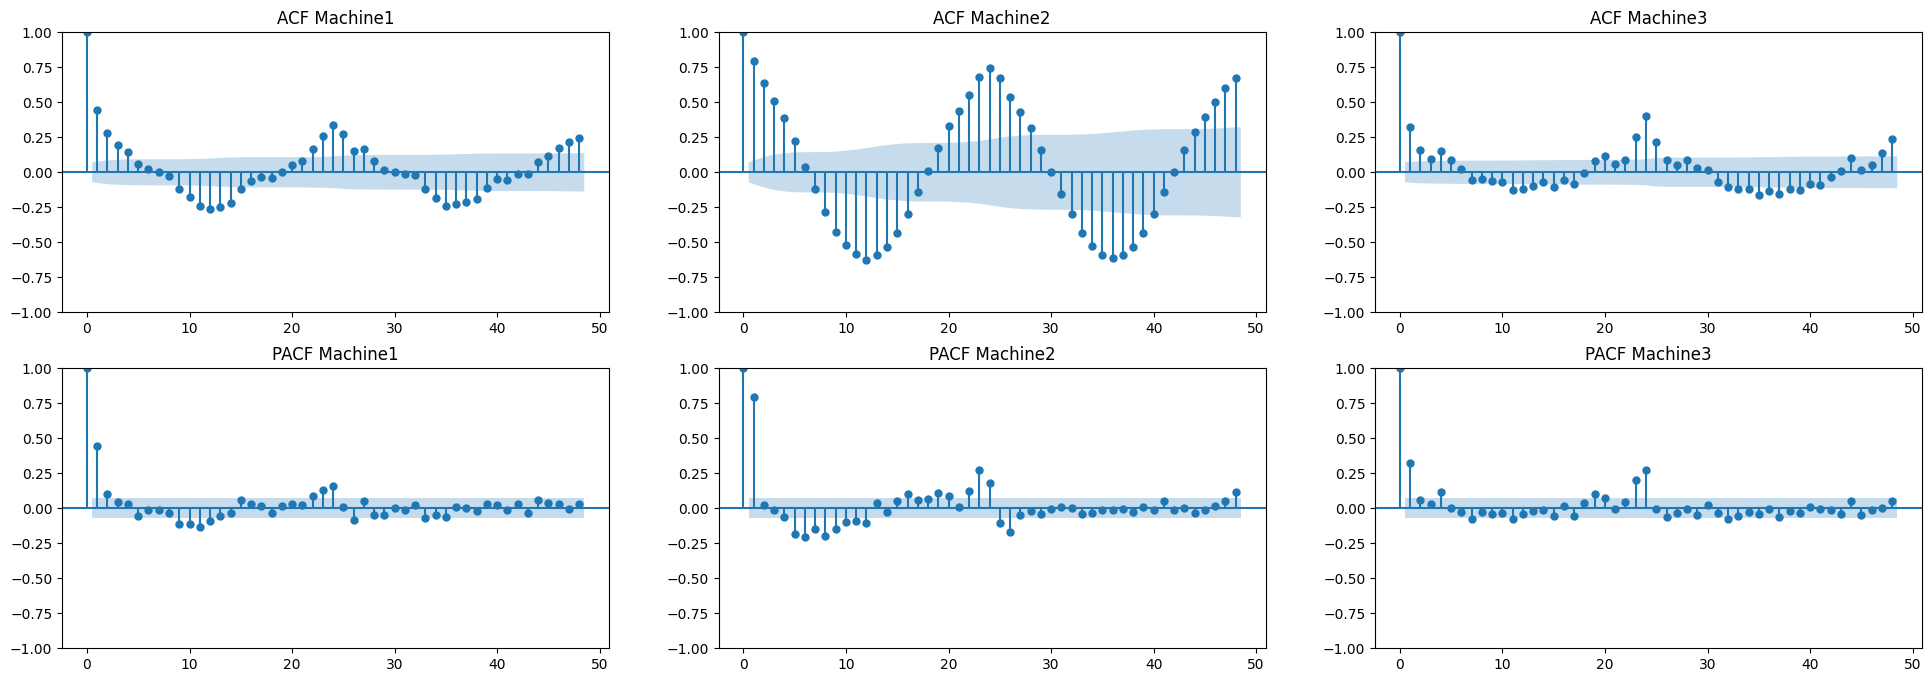

In [671]:
# Auto correlation and partial auto correlation
fig, ax = plt.subplots(2, 3, figsize=(24, 8))
plot_acf(m1_hourly_sales, lags=48, ax=ax[0][0], title='ACF Machine1')
plot_acf(m2_hourly_sales, lags=48, ax=ax[0][1], title='ACF Machine2')
plot_acf(m3_hourly_sales, lags=48, ax=ax[0][2], title='ACF Machine3')

plot_pacf(m1_hourly_sales, lags=48, ax=ax[1][0], title='PACF Machine1')
plot_pacf(m2_hourly_sales, lags=48, ax=ax[1][1], title='PACF Machine2')
plot_pacf(m3_hourly_sales, lags=48, ax=ax[1][2], title='PACF Machine3')
plt.show()

##### Feature engineering
for more details from surrounding information eg. `holiday`, `weather`, `population`, and `geolocation`
so we can finding trend in each location
in this phase we know only holiday so we will add features in these data

- add Weekday column with True, false
- add Holiday Sun, Sat

In [673]:
# feature engineering 
# weekday
m1_hourly_sales["weekday"] = m1_hourly_sales.index.dayofweek
m2_hourly_sales["weekday"] = m2_hourly_sales.index.dayofweek
m3_hourly_sales["weekday"] = m3_hourly_sales.index.dayofweek

In [674]:
# feature engineering 
# is_weekend
m1_hourly_sales['is_weekend'] = m1_hourly_sales['weekday'].apply(lambda x: True if x >= 5 else False)
m2_hourly_sales['is_weekend'] = m2_hourly_sales['weekday'].apply(lambda x: True if x >= 5 else False)
m3_hourly_sales['is_weekend'] = m3_hourly_sales['weekday'].apply(lambda x: True if x >= 5 else False)

In [675]:
# feature engineering 
# is_holiday

# from https://www.officeholidays.com/countries/thailand/2023
holiday_calendar = ['2023-10-13', '2023-10-24']

m1_hourly_sales['is_holiday'] = m1_hourly_sales.index.isin(holiday_calendar)
m2_hourly_sales['is_holiday'] = m2_hourly_sales.index.isin(holiday_calendar)
m3_hourly_sales['is_holiday'] = m3_hourly_sales.index.isin(holiday_calendar)

In [676]:
m3_hourly_sales

,amount,weekday,is_weekend,is_holiday
2023-10-01 00:00:00,1,6,True,False
2023-10-01 01:00:00,2,6,True,False
2023-10-01 02:00:00,0,6,True,False
2023-10-01 03:00:00,2,6,True,False
2023-10-01 04:00:00,0,6,True,False
...,...,...,...,...
2023-10-31 19:00:00,1,1,False,False
2023-10-31 20:00:00,0,1,False,False
2023-10-31 21:00:00,0,1,False,False
2023-10-31 22:00:00,2,1,False,False


In [677]:
# add dummy variable without drop first for more readable (can remove if needed)
m1_hourly_sales = pd.concat([m1_hourly_sales, pd.get_dummies(m1_hourly_sales['weekday'], prefix='weekday')], axis=1)
m2_hourly_sales = pd.concat([m2_hourly_sales, pd.get_dummies(m2_hourly_sales['weekday'], prefix='weekday')], axis=1)
m3_hourly_sales = pd.concat([m3_hourly_sales, pd.get_dummies(m3_hourly_sales['weekday'], prefix='weekday')], axis=1)

# mapping column name to readable name
weekday_map = {
  'weekday_0': 'Monday',
  'weekday_1': 'Tuesday',
  'weekday_2': 'Wednesday',
  'weekday_3': 'Thursday',
  'weekday_4': 'Friday',
  'weekday_5': 'Saturday',
  'weekday_6': 'Sunday'
}
m1_hourly_sales.rename(columns=weekday_map, inplace=True)
m2_hourly_sales.rename(columns=weekday_map, inplace=True)
m3_hourly_sales.rename(columns=weekday_map, inplace=True)

In [679]:
# feature engineering 
# convert Bool to int
m1_hourly_sales = m1_hourly_sales.astype(int)
m2_hourly_sales = m2_hourly_sales.astype(int)
m3_hourly_sales = m3_hourly_sales.astype(int)

In [719]:
m1_hourly_sales.head()

,amount,weekday,is_weekend,is_holiday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
2023-10-01 00:00:00,11,6,1,0,0,0,0,0,0,0,1
2023-10-01 01:00:00,10,6,1,0,0,0,0,0,0,0,1
2023-10-01 02:00:00,4,6,1,0,0,0,0,0,0,0,1
2023-10-01 03:00:00,5,6,1,0,0,0,0,0,0,0,1
2023-10-01 04:00:00,4,6,1,0,0,0,0,0,0,0,1


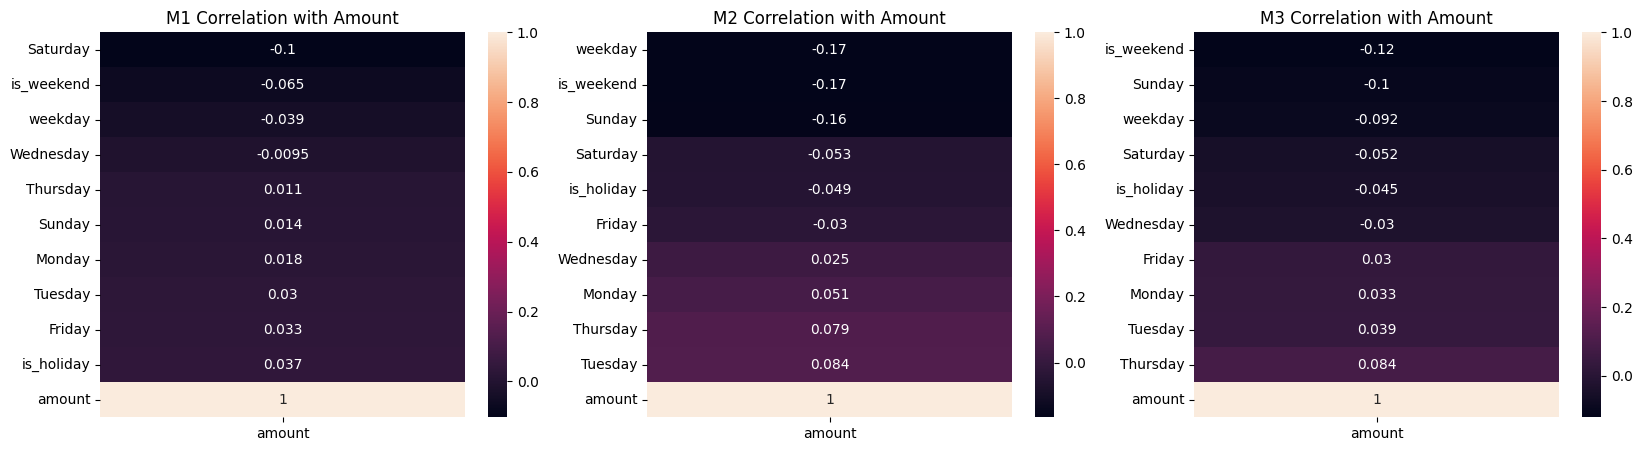

In [680]:
# check heatmap
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
sns.heatmap(m1_hourly_sales.corr()[['amount']].sort_values('amount'), annot=True)
plt.title('M1 Correlation with Amount');

plt.subplot(1, 3, 2)
sns.heatmap(m2_hourly_sales.corr()[['amount']].sort_values('amount'), annot=True)
plt.title('M2 Correlation with Amount');

plt.subplot(1, 3, 3)
sns.heatmap(m3_hourly_sales.corr()[['amount']].sort_values('amount'), annot=True)
plt.title('M3 Correlation with Amount');

From correlation heatmap Each POS have their own characteristics based on machine geolocation, and building that machine positioned

will need to extract more information later on
from building population, traffic through the day, building type (office, hospital, school, condominium, malls) 

In [681]:
# save to csv
m1_hourly_sales.to_csv('datasets/compute/m1_hourly_sales.csv')
m2_hourly_sales.to_csv('datasets/compute/m2_hourly_sales.csv')
m3_hourly_sales.to_csv('datasets/compute/m3_hourly_sales.csv')